In [368]:
class SimpleClass():
    
    def __init__(self,name):
        print('hello ' + name)
    
    def yell(self):
        print("YELLING")

In [369]:
x=SimpleClass('Atul')

hello Atul


In [370]:
x.yell()

YELLING


In [371]:
class ExtendedClass(SimpleClass):
    
    def __init__(self):
        super().__init__('Srishti')
        print("Extend")

In [372]:
y=ExtendedClass()

hello Srishti
Extend


In [373]:
y.yell()

YELLING


Operation

In [374]:
class Operation():
    def __init__(self,input_nodes=[]):
        self.input_nodes = input_nodes
        self.output_nodes =[]
    
        for node in input_nodes:
            node.output_nodes.append(self)
        
        _default_graph.operations.append(self)
    def compute(self):
        pass

In [375]:
class add(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs =[x_var,y_var]
        return x_var + y_var

In [376]:
class multiply(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
            
    def compute(self,x_var,y_var):
        self.inputs =[x_var,y_var]
        return x_var * y_var

In [377]:
class matmul(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs =[x_var,y_var]
        #numpy matrix
        return x_var.dot(y_var)

In [378]:
class Placeholder():
    
    def __init__(self):
        self.output_nodes =[]
        
        _default_graph.placeholders.append(self)

In [379]:
class Variable():
    
    def __init__(self,initial_value = None):
        
        self.value = initial_value
        self.output_nodes =[]
        
        _default_graph.variables.append(self)

In [380]:
class Graph():
    
    def __init__(self):
        
        self.operations =[]
        self.placeholders =[]
        self.variables =[]
        
    def set_as_default(self):
        global _default_graph
        _default_graph = self


z = Ax +b

A=10
b=1


z = 10*x +1

In [381]:
g = Graph()

In [382]:
g.set_as_default()

In [383]:
A = Variable(10)

In [384]:
b = Variable(1)

In [385]:
x= Placeholder()

In [386]:
y=multiply(A,x)

In [387]:
z = add(y,b)

In [388]:
def traverse_postorder(operation):
    """
    PostOrder Traversal of Nodes.Basically makes sure computations are done in correct order(Ax First then Ax+b).
    Feel free to copy and paste this.It is not super important for understanding the basic fundamental
    of deep learning
    
    """
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)
        
    recurse(operation)
    return nodes_postorder

In [389]:
import numpy as np
class Session():
    
    def run(self,operation,feed_dict={}): #feed_dict used in tensor flow
        nodes_postorder = traverse_postorder(operation)
       
        for node in nodes_postorder:
            
            if type(node) == Placeholder:
                node.output = feed_dict[node]
            elif type(node) == Variable:
                node.output = node.value
                
            else:
                #operation, list comprehension
                node.inputs =[input_node.output for input_node in node.input_nodes]
                
                node.output = node.compute(*node.inputs) #args
            
            if type(node.output) == list:
                node.output = np.array(node.output)
                
        return operation.output
                

In [390]:
sess = Session()

In [391]:
result = sess.run(operation=z,feed_dict={x:10})

In [392]:
result

101

In [393]:
g = Graph()

g.set_as_default()

A = Variable([[10,20],[30,40]])
b= Variable([1,2,]) #b= Variable([1,3])

x= Placeholder()
y= matmul(A,x)
z=add(y,b)

sess = Session()

In [394]:
sess.run(operation=z,feed_dict={x:10})

array([[101, 202],
       [301, 402]])

##    Classification : Linear

Activation Function


In [395]:
import matplotlib.pyplot as plt
%matplotlib inline

In [396]:
def sigmoid(z):
    return 1 / ( 1+ np.exp(-z))

In [397]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

Text(0,0.5,'value')

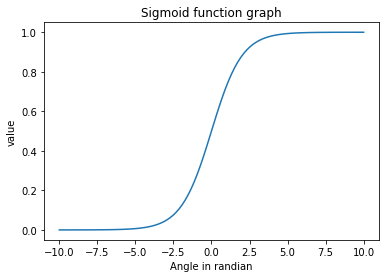

In [398]:
plt.plot(sample_z,sample_a)
plt.title("Sigmoid function graph")
plt.xlabel("Angle in randian")
plt.ylabel("value")

In [399]:
class Sigmoid(Operation):
    
    def __init__(self,z):
        super().__init__([z])
    
    def compute(self,z_val):
        return 1 / (1+np.exp(-z_val))

In [400]:
from sklearn.datasets import make_blobs

In [401]:
data = make_blobs(n_samples=50,n_features=2,centers=2,random_state=75)

In [402]:
 class Sigmoid(Operation):
        def __init__(self,z):
            super().__init__([z])
            
        def compute(self,z_val):
            return 1 / (1+np.exp(-z_val))

In [403]:
from sklearn.datasets import make_blobs

In [404]:
data = make_blobs(n_samples =50,n_features=2,centers=2,random_state=75)

In [405]:
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [406]:
type(data)

tuple

In [407]:
data[0] , data[1]

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [408]:
features = data[0]
labels =data[1]

Text(0.5,1,'Classification')

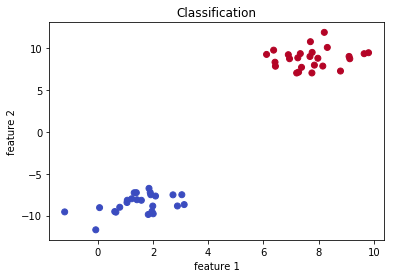

In [409]:
#scatter plot
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm' )
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("Classification")

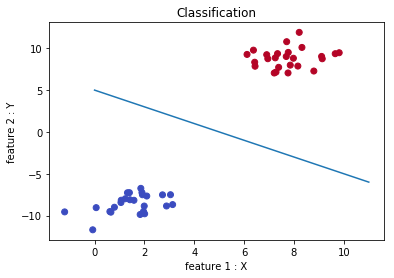

In [410]:
#scatter plot
x = np.linspace(0,11,10)
y= -x +5
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm' )
plt.xlabel("feature 1 : X")
plt.ylabel("feature 2 : Y")
plt.title("Classification")
plt.plot(x,y)

# (1,1) * f - 5=0

In [411]:
np.array([1,1]).dot(np.array([[8],[10]]))

array([18])

In [412]:
np.array([1,1]).dot(np.array([[2],[-10]]))

array([-8])

In [413]:
g =Graph()

In [414]:
g.set_as_default()

In [415]:
x=Placeholder()

In [416]:
w=Variable([1,1])

In [417]:
b=Variable(-5)

In [418]:
z=add(matmul(w,x),b)

In [419]:
a=Sigmoid(z)

In [420]:
sess = Session()

In [421]:
sess.run(operation =a,feed_dict={x:[8,10]})

0.99999773967570205

In [422]:
sess.run(operation =a,feed_dict={x:[2,-10]})

2.2603242979035746e-06